In [ ]:
import os
import sys
import uuid

import GCode
import GRBL
import matplotlib.pyplot as plt
import numpy as np

from utils import picture

# Spindle Cutting Tests

## Objective
- Map commanded speed to actual speed.

## Test Setup

- CyberTech DT2234A Digital Tachometer.
- CSI3010SW dialed all the way up: 31.5V

# Code:

In [17]:
%matplotlib inlinesys.path.append("..")

Test Setup Picture

Spindle is mounted upside down to make it easier to read speed.

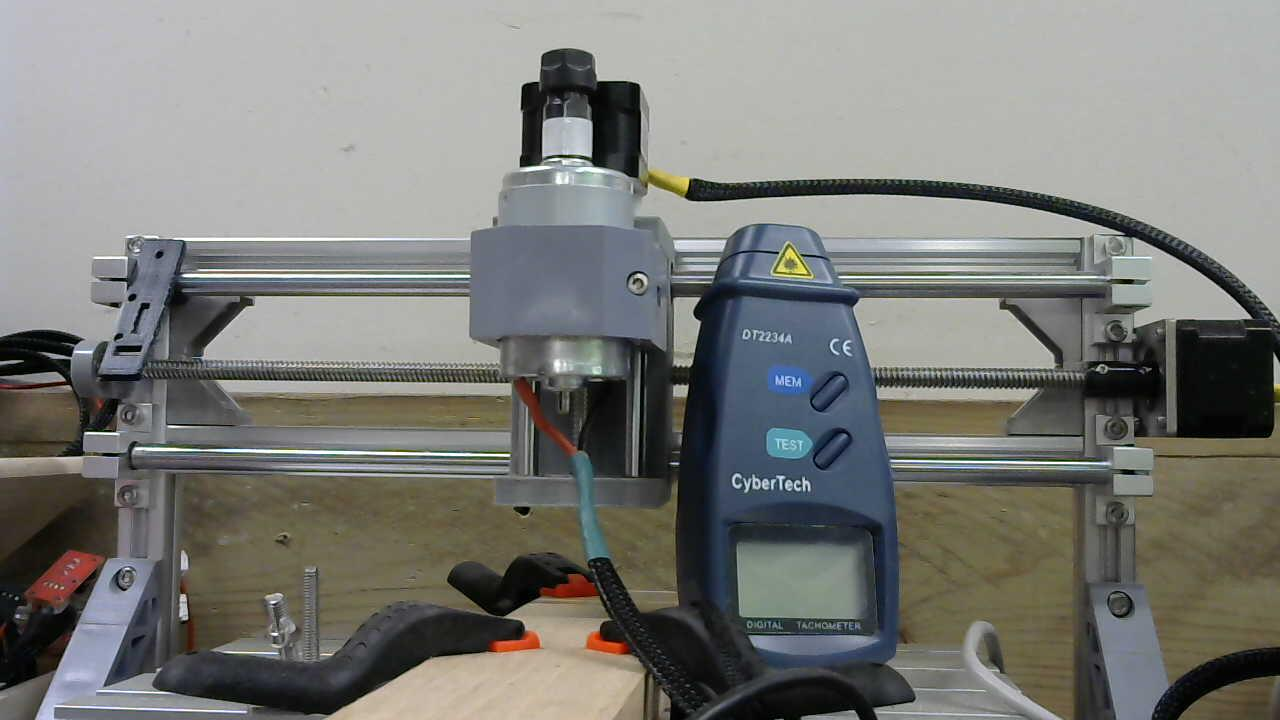

In [19]:
picture()


In [20]:
cnc.status
cnc.kill_alarm()
cnc.status


'<Idle|MPos:0.000,0.000,0.000|Bf:15,127|FS:0,0>'

GRBL Configuration

In [21]:
cnc.cmd("$$")


['ok',
 '$0=10',
 '$1=25',
 '$2=0',
 '$3=5',
 '$4=0',
 '$5=0',
 '$6=0',
 '$10=3',
 '$11=0.010',
 '$12=0.002',
 '$13=0',
 '$20=0',
 '$21=1',
 '$22=1',
 '$23=0',
 '$24=25.000',
 '$25=500.000',
 '$26=250',
 '$27=1.000',
 '$30=1000',
 '$31=0',
 '$32=0',
 '$100=800.000',
 '$101=800.000',
 '$102=800.000',
 '$110=800.000',
 '$111=800.000',
 '$112=500.000',
 '$120=10.000',
 '$121=10.000',
 '$122=10.000',
 '$130=200.000',
 '$131=200.000',
 '$132=200.000',
 'ok']

In [22]:
data_log = dict()


In [24]:
for S in [5, 50, 100, 250, 500, 750, 900, 1000]:
    try:
        cmd = "M3 S{}".format(S)
        cnc.cmd(cmd)
        print("GRBL Command: '{}'".format(cmd))
        raw = input("Measured Speed: ")
        if len(raw) == 0:
            raise KeyboardInterrupt
        data_log[S] = int(raw)
    except KeyboardInterrupt:
        print("Ending data collection")
        break
    except:
        raise


GRBL Command: 'M3 S5'
Measured Speed: 0
GRBL Command: 'M3 S50'
Measured Speed: 455
GRBL Command: 'M3 S100'
Measured Speed: 599
GRBL Command: 'M3 S250'
Measured Speed: 17000
GRBL Command: 'M3 S500'
Measured Speed: 22000
GRBL Command: 'M3 S750'
Measured Speed: 2300
GRBL Command: 'M3 S900'
Measured Speed: 23700
GRBL Command: 'M3 S1000'
Measured Speed: 24500


In [25]:
cnc.cmd("M5")


['ok', 'ok']

# Results

Cheap tachometers are bad. Occasionally flips between powers of 10 for results.

The screw also stripped clamping the spindle, so... that needs replaced.

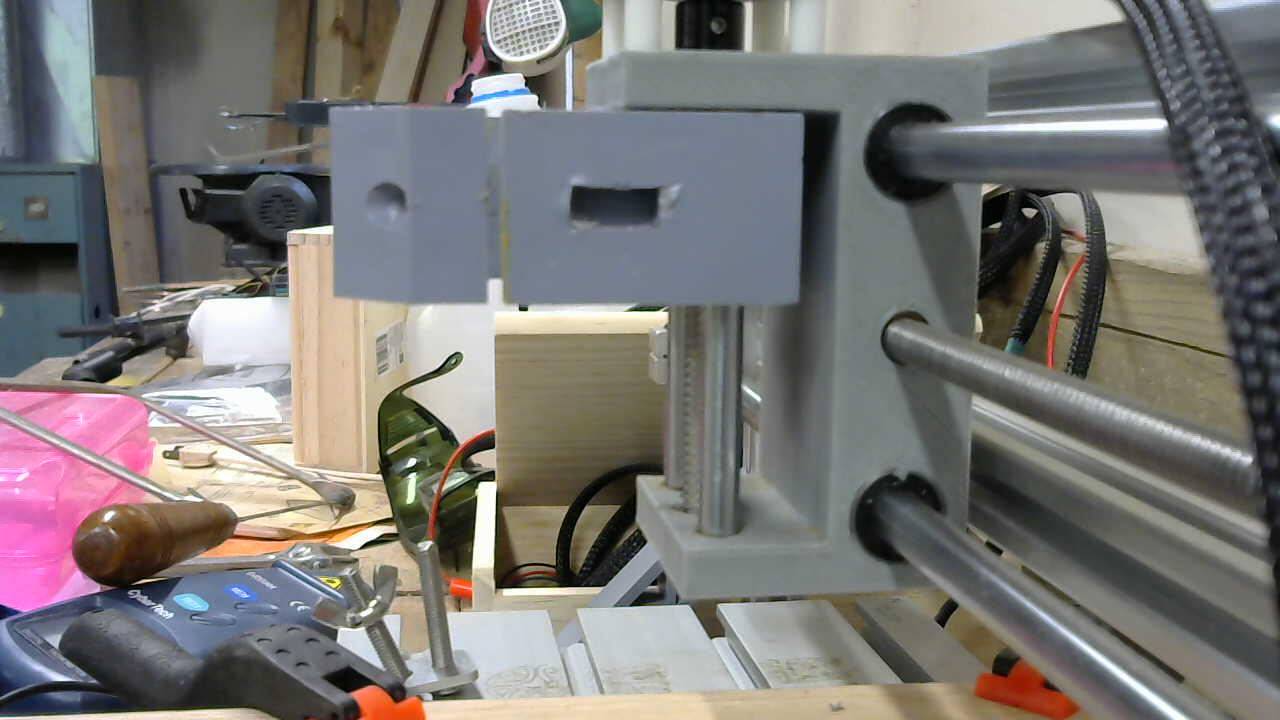

In [26]:
picture()
